In [2]:
import pandas as pd
import numpy as np
import math
from nltk.stem.snowball import SnowballStemmer
from itertools import islice
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import defaultdict
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle

In [3]:
data = pd.read_csv("lyrics.csv")

In [4]:
data = data.replace({'[iI][Nn][sS][Tt][Rr][Uu][Mm][Ee][Nn][Tt]' : math.nan}, regex=True)
data = data.replace({'instrument': math.nan})
data = data.replace({'Instrument' : math.nan})
data = data.dropna()
data = data[data.genre != "Not Available"]
data = data.replace({'\n': ' '}, regex=True)

In [5]:
len(data)

237769

In [6]:
data = data.loc[(data['genre'] == 'Pop') | (data['genre'] == 'Rock') | (data['genre'] == 'Hip-Hop') | (data['genre'] == 'Metal') | (data['genre'] == 'Country')]
#x = training_genre_lyrics.loc[training_genre_lyrics['genre'] == 'Jazz']
len(data)
data.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [7]:
data_pop = data.loc[(data['genre'] == 'Pop')]
data_rock = data.loc[(data['genre'] == 'Rock')]
data_hiphop = data.loc[(data['genre'] == "Hip-Hop")]
data_metal = data.loc[(data['genre']== "Metal")]
data_country = data.loc[(data['genre'] == "Country")]


def get_sample(num_each):
    pop_df = data_pop.sample(n = num_each, replace = True)
    rock_df = (data_rock.sample(n = num_each, replace=True))
    hiphop_df = (data_hiphop.sample(n = num_each, replace=True))
    metal_df = (data_metal.sample(n = num_each, replace=True))
    country_df = (data_country.sample(n = num_each, replace=True))
    ret_df = pd.concat([pop_df, rock_df, hiphop_df, metal_df, country_df])
    ret_df = ret_df.sample(frac=1)
    return ret_df

training_set = get_sample(10000)
validation_set = get_sample(10000)
test_set = get_sample(10000)

#training_50k = data.sample(n=50000, replace=True)
#validation_50k = data.sample(n=50000, replace=True)
#testing_50k = data.sample(n=50000, replace=True)



In [8]:
#training_test['genre'].value_counts()


In [9]:
# Filter just genre and lyrics columns
training_genre_lyrics = training_set.filter(['genre', 'lyrics'])
training_artist = training_set.filter(['genre', 'artist'])
validation_genre_lyrics = validation_set.filter(['genre', 'lyrics'])
validation_artist = validation_set.filter(['genre','artist'])
testing_genre_lyrics = test_set.filter(['genre', 'lyrics'])
testing_artist = test_set.filter(['genre','lyrics'])

In [10]:
print (training_genre_lyrics)

          genre                                             lyrics
79604     Metal  Silence in the living room Hours feel like day...
313743  Hip-Hop  Diggin In The Crates 9 9 Yeah yeah Still Diggi...
355361      Pop  Safe as houses Built on quicksand Because I pl...
168515      Pop  Quisiera En esta noche detener El tiempo Y en ...
245582  Country  Oh it's late, I know I should be leaving We've...
216498    Metal  Ignorance breeds fear, breeds hate, breeds vio...
162973     Rock  Another day dawn's grey It's enough to make me...
142381    Metal  Dancing in the temple of the mad queen bee Dee...
87486      Rock  Well c'mon over baby, whole lotta shakin going...
54890   Hip-Hop  i want [10x] make my list , check my list , pr...
68127   Country  Just across the mountain there is something ca...
42102       Pop  A train to nowhere I walk around and I tried t...
310128  Country  She was quite a looker she kept herself up wel...
90063     Metal  Father can you hear me, did you talk to mothe

In [11]:
testing_genre_lyrics = shuffle(testing_genre_lyrics)
testing_genre_lyrics = testing_genre_lyrics.sample(n = 10000, replace = True)

In [23]:
#goes thru training set and append genre pop's lyrics
pop_lyrics_list = []
for x in training_genre_lyrics.iterrows():
    if x[1][0] == 'Pop':
        pop_lyrics_list.append(x[1][1])
pop_lyrics = pd.DataFrame({"ly": pop_lyrics_list})
print (len(pop_lyrics))

10000


In [24]:
rock_lyrics_list = []
for x in training_genre_lyrics.iterrows():
    if x[1][0] == 'Rock':
        rock_lyrics_list.append(x[1][1])
print (len(rock_lyrics_list))
rock_lyrics = pd.DataFrame({"ly": rock_lyrics_list})

10000


In [25]:
hiphop_lyrics_list = []
for x in training_genre_lyrics.iterrows():
    if x[1][0] == 'Hip-Hop':
        hiphop_lyrics_list.append(x[1][1])
hiphop_lyrics = pd.DataFrame({"ly": hiphop_lyrics_list})
print (len(hiphop_lyrics))

10000


In [32]:
metal_lyrics_list = []
for x in training_genre_lyrics.iterrows():
    if x[1][0] == 'Metal':
        metal_lyrics_list.append(x[1][1])
metal_lyrics = pd.DataFrame({"ly": metal_lyrics_list})
print (len(metal_lyrics))

10000


In [33]:
country_lyrics_list = []
for x in training_genre_lyrics.iterrows():
    if x[1][0] == 'Country':
        country_lyrics_list.append(x[1][1])
country_lyrics = pd.DataFrame({"ly": country_lyrics_list})
print (len(country_lyrics))

10000


In [34]:
#goes thru training artist to find artist name for each genre
pop_artist = []
for x in training_artist.iterrows():
    if x[1][0] == 'Pop':
        pop_artist.append(x[1][1])
pop_artist = pd.DataFrame({"artistName": pop_artist})
print (len(pop_artist))

10000


In [35]:
rock_artist = []
for x in training_artist.iterrows():
    if x[1][0] == 'Rock':
        rock_artist.append(x[1][1])
rock_artist = pd.DataFrame({"artistName": rock_artist})
print (len(rock_artist))

10000


In [36]:
hiphop_artist = []
for x in training_artist.iterrows():
    if x[1][0] == 'Hip-Hop':
        hiphop_artist.append(x[1][1])
hiphop_artist = pd.DataFrame({"artistName": hiphop_artist})
print (len(hiphop_artist))

10000


In [37]:
metal_artist = []
for x in training_artist.iterrows():
    if x[1][0] == 'Metal':
        metal_artist.append(x[1][1])
metal_artist = pd.DataFrame({"artistName": metal_artist})
print (len(metal_artist))

10000


In [38]:
country_artist = []
for x in training_artist.iterrows():
    if x[1][0] == 'Country':
        country_artist.append(x[1][1])
country_artist = pd.DataFrame({"artist": country_artist})
print (len(country_artist))

10000


In [39]:
#stop words
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"])

In [40]:
# Takes a dataframe/list containing lyrics and returns a tuple with the terms and weights 
def vectorize_feature(genre_lyrics, num_words):
    stemmer = SnowballStemmer("english")
    genre_lyrics['stemmed'] = genre_lyrics.ly.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))
    #genre_lyrics.stemmed.head()
    
    cvec = CountVectorizer(min_df=1,max_df= 0.5, ngram_range=(1,3), stop_words= ENGLISH_STOP_WORDS)
    cvec.fit(genre_lyrics.stemmed)
    
    # -- use for debugging -- x = list(islice(cvec.vocabulary_.items(), 20))
    
    cvec_counts = cvec.transform(genre_lyrics.stemmed)
    
    transformer = TfidfTransformer()
    transformed_weights = transformer.fit_transform(cvec_counts)
    
    weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
    weights_df = weights_df.sort_values(by='weight', ascending=False)[:num_words]
    
    #term_weight_list = []
    term_weight_dict = defaultdict(int)
    for _, row in weights_df.iterrows():
        # Returns a list of (term, weight) tuples
        #term_phrase_list.append((row['term'], row['weight']))
        term_weight_dict[row['term']] = row['weight']
    
    # return term_weight_list
    return term_weight_dict

In [41]:
rock_dicts = vectorize_feature(rock_lyrics, 1000)
pop_dicts = vectorize_feature(pop_lyrics, 1000)
hiphop_dicts = vectorize_feature(hiphop_lyrics, 1000)
metal_dicts = vectorize_feature(metal_lyrics, 1000)
country_dicts = vectorize_feature(country_lyrics, 1000)

In [24]:
#print (df(rock_dicts.keys()))

In [25]:
# counter = 0
# rock = list(rock_dicts.keys())
# pop = list(pop_dicts.keys())
# for i in range(1000):
#     if rock[i] == pop[i]:
#         counter += 1
genre = {
    'Rock': 0,
    'Pop' : 1,
    'Hip-Hop' : 2,
    'Metal' : 3,
    'Country' : 4,
}


In [26]:
# Given new lyrics, return list of sums of weights
def find_weights(artist, lyrics):
    weight_list = [0]*5
    stemmer = SnowballStemmer("english")
    stemmed_lyrics = ' '.join([stemmer.stem(y) for y in lyrics.split(' ')])
    for i in stemmed_lyrics.split():
        weight_list[0] += rock_dicts[i]
        weight_list[1] += pop_dicts[i]
        weight_list[2] += hiphop_dicts[i]
        weight_list[3] += metal_dicts[i]
        weight_list[4] += country_dicts[i]
    if artist in rock_artist:
        return genre['Rock']
    elif artist in pop_artist:
        return genre['Pop']
    elif artist in hiphop_artist:
        return genre['Hip_Hop']
    elif artist in metal_artist:
        return genre['Metal']
    elif artist in country_artist:
        return genre['Country']
    else:
        return weight_list.index(max (weight_list))

In [27]:
#find_weights('evile',training_genre_lyrics.lyrics[2])

In [28]:
genre = {
    'Rock': 0,
    'Pop' : 1,
    'Hip-Hop' : 2,
    'Metal' : 3,
    'Country' : 4,
}

In [29]:
x_train = [find_weights(x,y) for (x,y) in zip(training_artist.artist,training_genre_lyrics.lyrics)]
#print (x_train)

In [30]:
#print (x_train)

In [31]:
y_train = [genre[x] for x in training_genre_lyrics.genre]

In [32]:
acc = [(x == y) for (x,y) in zip(x_train, y_train)]
# acc = sum(acc) * 1.0/50000
# print (acc)
counter = 0
for i in range(len(acc)):
    if acc[i] == True:
        counter += 1
print (counter/50000)


0.41986


In [33]:
# x_valid = [find_weights(x,y) for (x,y) in zip(validation_artist.artist,validation_genre_lyrics.lyrics)]
# y_valid = [genre[x] for x in validation_genre_lyrics.genre]
x_valid = x_train[25000:]
y_valid = y_train[25000:]

In [34]:
from sklearn.svm import LinearSVC
from sklearn import svm
x_train = np.asarray(x_train).reshape(-1, 1)
x_valid = np.asarray(x_valid).reshape(-1, 1)
bestAcc = 0
bestCLF = None
for c in 0.01, 0.1, 1, 10, 100:
  clf = svm.LinearSVC(C = c) # Linear SVM is faster
  clf.fit(x_train, y_train)
  predictions = [int(x) for x in clf.predict(x_valid)]
  acc = [(x == y) for (x,y) in zip(predictions, y_valid)]
  acc = sum(acc) * 1.0 / len(acc)
  if acc > bestAcc:
    bestAcc = acc
    bestCLF = clf
  print("C = " + str(c) + ": validation accuracy = " + str(acc))

C = 0.01: validation accuracy = 0.28896
C = 0.1: validation accuracy = 0.28896
C = 1: validation accuracy = 0.28896
C = 10: validation accuracy = 0.2564
C = 100: validation accuracy = 0.24444


In [35]:
x_test = [find_weights(x,y) for (x,y) in zip(testing_artist,testing_genre_lyrics.lyrics)]
y_test = [genre[x] for x in testing_genre_lyrics.genre]

In [36]:
x_test = np.asarray(x_train).reshape(-1, 1)
x_test = np.asarray(x_test).reshape(-1, 1)
bestAcc = 0
bestCLF = None
for c in 0.01, 0.1, 1, 10, 100:
  clf = svm.LinearSVC(C = c) # Linear SVM is faster
  clf.fit(x_train, y_train)
  predictions = [int(x) for x in clf.predict(x_test)]
  acc = [(x == y) for (x,y) in zip(predictions, y_test)]
  acc = sum(acc) * 1.0 / len(acc)
  if acc > bestAcc:
    bestAcc = acc
    bestCLF = clf
  print("C = " + str(c) + ": validation accuracy = " + str(acc))

C = 0.01: validation accuracy = 0.1987
C = 0.1: validation accuracy = 0.1987
C = 1: validation accuracy = 0.1987
C = 10: validation accuracy = 0.2028
C = 100: validation accuracy = 0.2049


In [37]:
 from sklearn.metrics import r2_score

In [38]:
r2_score(x_train, y_train)

-0.85746681867410701

In [52]:
# Get jaccard similarity
def get_similarity(set_1, set_2):
    intersection = len(list(set(set_1) & set(set_2)))
    union = len(set(list(set(set_1) | set(set_2))))
    return (intersection)/(union)

In [53]:
rock_keys = rock_dicts.keys()
pop_keys = pop_dicts.keys()
hiphop_keys = hiphop_dicts.keys()
metal_keys = metal_dicts.keys()
country_keys = country_dicts.keys()

In [54]:
rock_pop_sim = get_similarity(rock_keys, pop_keys)
rock_hiphop_sim = get_similarity(rock_keys, hiphop_keys)
rock_metal_sim = get_similarity(rock_keys, metal_keys)
rock_country_sim = get_similarity(rock_keys, country_keys)

pop_hiphop_sim = get_similarity(pop_keys, hiphop_keys)
pop_metal_sim = get_similarity(pop_keys, metal_keys)
pop_country_sim = get_similarity(pop_keys, country_keys)

hiphop_metal_sim = get_similarity(hiphop_keys, metal_keys)
hiphop_country_sim = get_similarity(hiphop_keys, country_keys)

metal_country_sim = get_similarity(metal_keys, country_keys)

In [58]:
np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [59]:
ax

In [67]:
import matplotlib.pyplot as plt

In [92]:
# rock __ pop __ hiphop __ metal __ country

similarity_matrix = np.matrix([[1, rock_pop_sim, rock_hiphop_sim, rock_metal_sim, rock_country_sim], \
                               [rock_pop_sim, 1, pop_hiphop_sim, pop_metal_sim, pop_country_sim], \
                              [rock_hiphop_sim, pop_hiphop_sim, 1, hiphop_metal_sim, hiphop_country_sim],\
                              [rock_metal_sim, pop_metal_sim, hiphop_metal_sim, 1, metal_country_sim],
                              [rock_country_sim, pop_country_sim, hiphop_country_sim, metal_country_sim, 1]])
similarity_matrix

matrix([[ 1.        ,  0.66666667,  0.50037509,  0.52671756,  0.63532298],
        [ 0.66666667,  1.        ,  0.4587892 ,  0.43575018,  0.57480315],
        [ 0.50037509,  0.4587892 ,  1.        ,  0.36054422,  0.42348754],
        [ 0.52671756,  0.43575018,  0.36054422,  1.        ,  0.42450142],
        [ 0.63532298,  0.57480315,  0.42348754,  0.42450142,  1.        ]])

In [103]:
labels = ["Rock", "Pop", "Hip-Hop", "Metal", "Country"]

ax = sns.heatmap(similarity_matrix, annot=True, fmt="f", xticklabels = labels, yticklabels = labels)
ax.set_xticklabels(labels, rotation = 70)
ax.set_yticklabels(reversed(labels), rotation = 45)

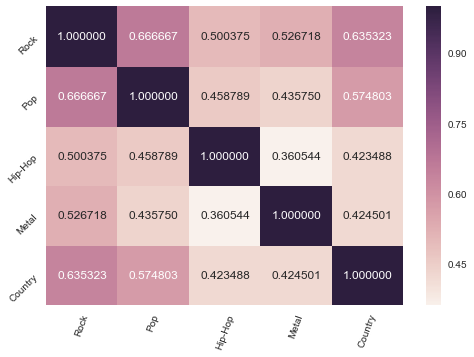

In [104]:
plt.show()